In [1]:
%matplotlib inline 
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def SEIRD(y, t, N,  δ, γ, μ):
    S,E, I, R, D = y
    def α(t):
        return s * I/N + α_opt
    def β(t):
        return r0(t) *  1 / ( α(t) * 1/μ + (1 - α(t)) * 1/γ)
    dSdt =-β(t) * S * I / N
    dEdt = β(t) * S * I / N - δ*E
    dIdt = δ * E - (1-α(t)) * γ * I - α(t) * μ * I
    dRdt = (1-α(t)) * γ * I
    dDdt = α(t) * μ * I
    return dSdt, dEdt, dIdt, dRdt, dDdt

In [3]:
N  = 1000000
R_0_start, k, x0, R_0_end = 2.0, 0.5, 200, 0.6 

def r0(t): 
    return (R_0_start-R_0_end) / (1 + np.exp(-k*(-t+x0))) + R_0_end

q  = 7.0 
γ  = 1.0 / q 
δ  = 1.0/ 5.0 
μ  = 1/9 

α_by_agegroup = {"0-29": 0.01, "30-59": 0.05, "60-89": 0.2, "89+": 0.3} 
proportion_of_agegroup = {"0-29": 0.1, "30-59": 0.3, "60-89": 0.4, "89+": 0.2} 
s = 0.3 
α_opt = sum(α_by_agegroup[i] * proportion_of_agegroup[i] for i in list(α_by_agegroup.keys())) 

S0, E0, I0, R0, D0 =  N-1, 1, 0, 0, 0  

In [4]:
t = np.linspace(0, 364, 365) 
y0 = S0, E0, I0, R0, D0 
ret = odeint(SEIRD, y0, t, args=(N, δ, γ, μ))
S, E, I, R, D = ret.T

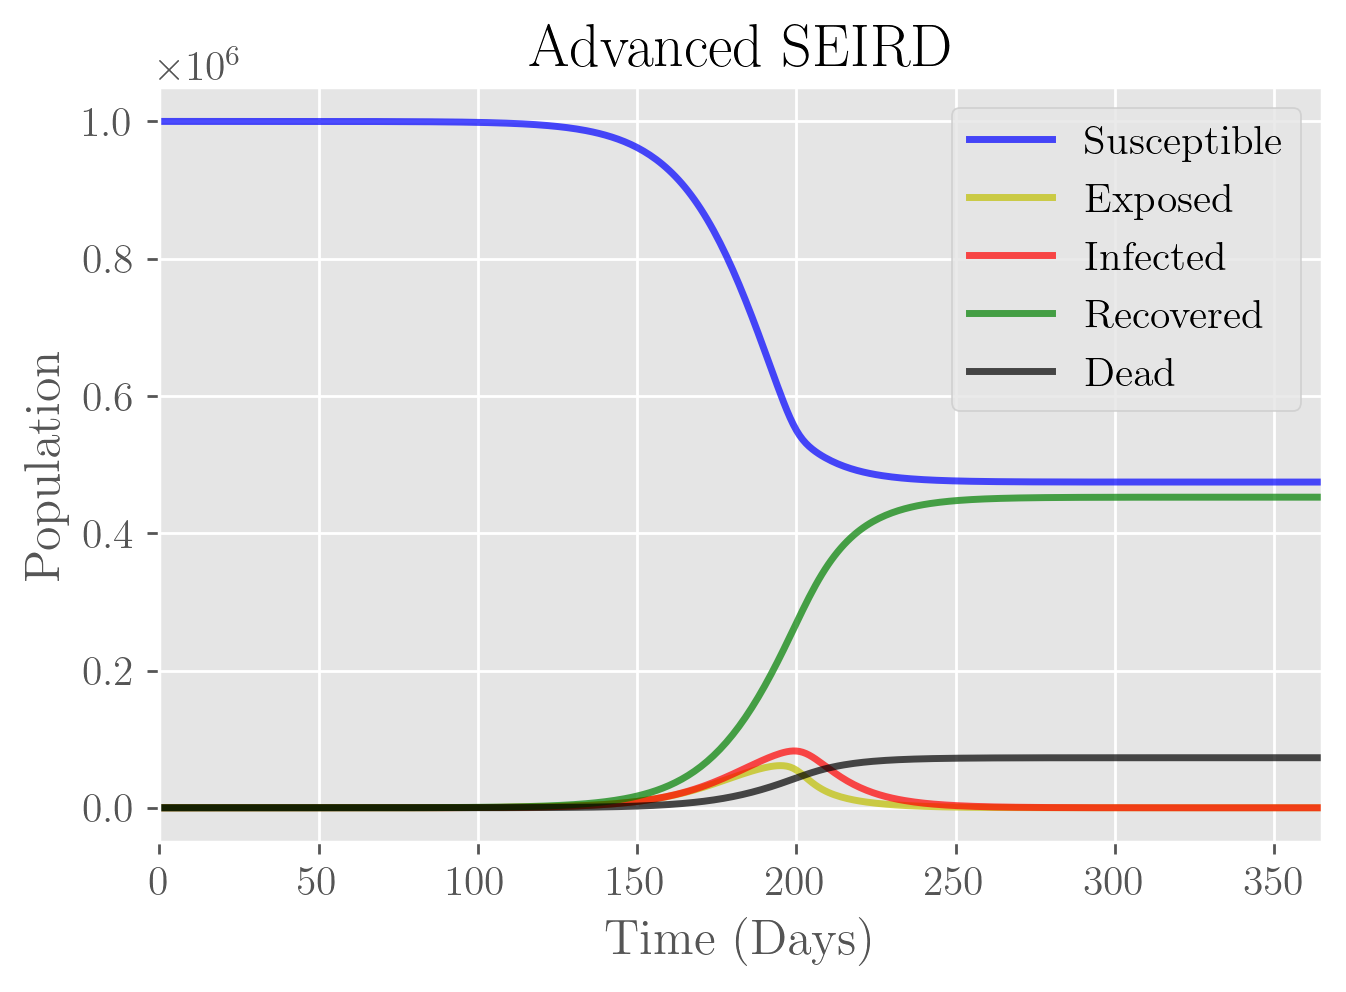

In [5]:
plt.style.use('ggplot')
plt.rcParams['figure.dpi']= 250
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif',weight = 'bold', size =12 )

f, ax = plt.subplots()
ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Dead')

plt.legend(loc='best')

plt.xlabel('Time (Days)')
plt.xlim([0, 365])

plt.ylabel('Population')

plt.title("Advanced SEIRD".format(x0))
plt.draw()
plt.savefig('SEIRDPlot-dependentlockdownlogistic.png', dpi=300)
plt.show()
